In [25]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import*

Hamiltonian of Two-band k.p model including exchange interaction:

$$H = I_2 \otimes H_0(k) + H_{SOC}(k) + H_{ex}(k)$$

For more details, please see https://www.nature.com/articles/ncomms13612

In [26]:
def H_0(Delta,k1,k2,t12,t11_p,t12_p,t22_p,tau):
    
    
    b1 = 4*np.pi/3*np.array([1/2,np.sqrt(3)/2])
    b2 = 4*np.pi/3*np.array([-1/2,np.sqrt(3)/2])
    
    k = k1*b1 + k2*b2
    
    qx = np.inner(k,b1)
    qy = np.inner(k,b2)
    
    H1 = Qobj([[Delta/2 + t11_p*(qx + qy)*(qx + qy), t12*(tau*qx - 1j*qy) + t12_p*(tau*qx + 1j*qy)*(tau*qx + 1j*qy)],
            [t12*(tau*qx + 1j*qy) + t12_p*(tau*qx - 1j*qy)*(tau*qx - 1j*qy),-Delta/2 + t11_p*(qx + qy)*(qx + qy)]
             ])
    H = tensor(qeye(2),H1)
    evals = H.eigenenergies()
    return (H)

In [27]:
def H_SOC(tau,lamda):
    Lx = sigmax()
    Ly = sigmay()
    Lz = sigmaz()
    
    a = Qobj([[0,1],[0,0]])
    b = Qobj([[0,0],[1,0]])
    c = Qobj([[1,0],[0,-1]])
    H1 = tensor(a , sigmax() - 1j*sigmay())
    H2 = tensor(b , sigmax() + 1j*sigmay())
    H3 = tensor(c , sigmaz())
        
    H = tau*lamda/2*(H1 + H2 + H3)
    evals = H.eigenenergies()
    return(H)

In [28]:
def H_ex(mu,ml):
    H1 = Qobj([[-mu,0],[0,-ml]])
    H = tensor(sigmaz(),H1)
    
    return(H)

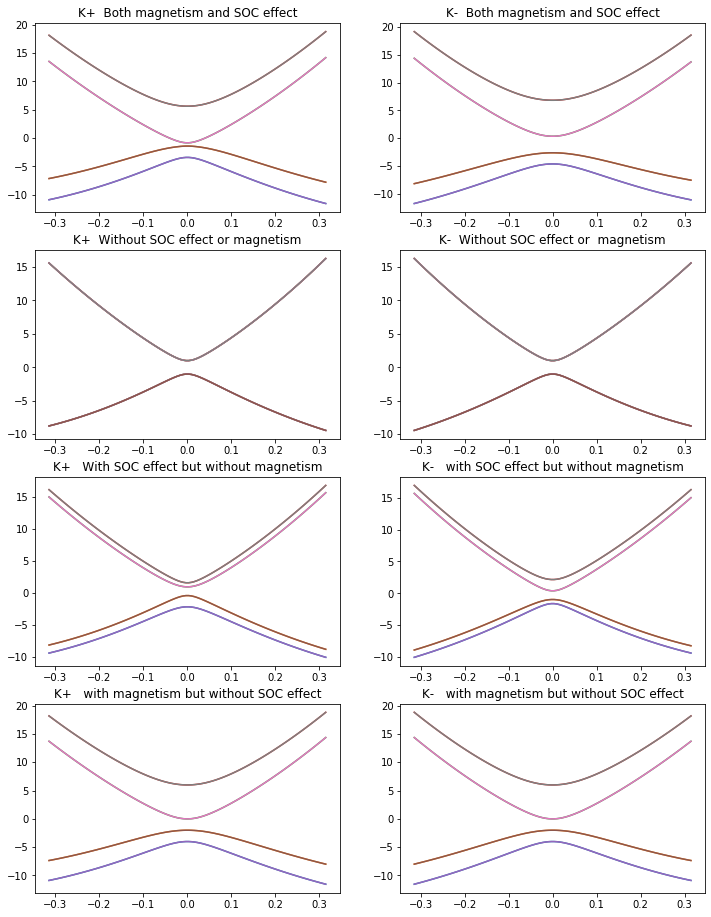

In [38]:
plt.figure(figsize = (12,16))
step_k = 100
k = np.linspace(-1/10*np.pi,1/10*np.pi,step_k)
step_k_2 = 2
k_2 = np.linspace(-np.pi,np.pi,step_k_2)


plt.subplot(421)
for u in k_2:
    result = []
    for i in k :
        H = H_0(2,i,0,2,0.05,0.05,0.05,1) + H_SOC(1,1.2) + H_ex(5,-1)
        evals = H.eigenenergies()
        result.append(evals)
    for j in range(4):
        
        plt.title("K+  Both magnetism and SOC effect")
        plt.plot(k,[temp[j] for temp in result])

        
plt.subplot(422)    
for u in k_2:
    result = []
    for i in k :
        H = H_0(2,i,0,2,0.05,0.05,0.05,-1) + H_SOC(-1,1.2) + H_ex(5,-1)
        evals = H.eigenenergies()
        result.append(evals)
        
    for j in range(4):
        
        plt.title("K-  Both magnetism and SOC effect")
        plt.plot(k,[temp[j] for temp in result])
       
    
    
plt.subplot(423) 
for u in k_2:
    result = []
    for i in k :
        H = H_0(2,i,0,2,0.05,0.05,0.05,1) 
        evals = H.eigenenergies()
        result.append(evals)
    for j in range(4):
        
        plt.title("K+  Without SOC effect or magnetism")
        plt.plot(k,[temp[j] for temp in result])
     
 

plt.subplot(424)
for u in k_2:
    result = []
    for i in k :
        H = H_0(2,i,0,2,0.05,0.05,0.05,-1) 
        evals = H.eigenenergies()
        result.append(evals)
    for j in range(4):
        
        plt.title("K-  Without SOC effect or  magnetism")
        plt.plot(k,[temp[j] for temp in result])

plt.subplot(425)        
for u in k_2:
    result = []
    for i in k :
        H = H_0(2,i,0,2,0.05,0.05,0.05,1) + H_SOC(1,1.2)
        evals = H.eigenenergies() 
        result.append(evals)
    for j in range(4):
        
        plt.title("K+   With SOC effect but without magnetism")
        plt.plot(k,[temp[j] for temp in result])   

        
plt.subplot(426)        
for u in k_2:
    result = []
    for i in k :
        H = H_0(2,i,0,2,0.05,0.05,0.05,-1) + H_SOC(-1,1.2)
        evals = H.eigenenergies() 
        result.append(evals)
    for j in range(4):
       
        plt.title("K-   with SOC effect but without magnetism")
        plt.plot(k,[temp[j] for temp in result])  
        
        
plt.subplot(427)        
for u in k_2:
    result = []
    for i in k :
        H = H_0(2,i,0,2,0.05,0.05,0.05,1) + H_ex(5,-1)
        evals = H.eigenenergies() 
        result.append(evals)
    for j in range(4):
        
        plt.title("K+   with magnetism but without SOC effect")
        plt.plot(k,[temp[j] for temp in result])   

plt.subplot(428)        
for u in k_2:
    result = []
    for i in k :
        H = H_0(2,i,0,2,0.05,0.05,0.05,-1) + H_ex(5,-1)
        evals = H.eigenenergies() 
        result.append(evals)
    for j in range(4):
        
        plt.title("K-   with magnetism but without SOC effect")
        plt.plot(k,[temp[j] for temp in result])   


$$H = I_2 \otimes H_0(k) + H_{SOC}(k) + H_{ex}(k)$$